# Table of Contents:

- [Introduction](#introduction)
- [Import Library](#import-library)
- [Functions](#functions)
- [Data Import & Cleaning](#data-import-&-cleaning)
    - [Load In Data](#load-in-data)
    - [Clean Data](#clean-data)
        - [Clean ACT 2017](#clean-act-2017)
        - [Clean ACT 2018](#clean-act-2018)
        - [Clean ACT 2019](#clean-act-2019)
        - [Clean SAT 2017](#clean-sat-2017)
        - [Clean SAT 2018](#clean-sat-2018)
        - [Clean SAT 2019](#clean-sat-2019)
- [Merge Data](#merge-data)
    - [Merge ACT/SAT 2017 Data](#merge-act/sat-2017-data)
    - [Merge ACT/SAT 2018 Data](#merge-act/sat-2018-data)
    - [Merge ACT/SAT 2019 Data](#merge-act/sat-2019-data)
- [Exploratory Data Analysis](#exploratory-data-analysis)
    - [Load In Merged Data](#load-in-merged-data)
    - [Summary Statistics](#summary-statistics)

## Introduction

Analyzing data spanning 2017 to 2019, we examine ACT participation rates, ACT composite scores, SAT participation rates, and SAT total scores, categorized by their respective census regions. The main aim is to uncover trends specific to each region and extract insights that can guide the strategic distribution of resources to areas in need.

## Import Library

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Functions

The mean_of_values function takes in values and manually returns the mean of the values.

In [35]:
def mean_of_values(number_value):
    total = sum(number_value)
    mean_calc = total / float(len(number_value))
    
    return mean_calc

The standard_dev function takes in values and returns the standard deviation of the values using the formula above.

In [36]:
def standard_dev(val):
    mean = mean_of_values(val)
    square_diff_sum = 0

    for number in val:
        square_diff_sum += (number - mean) ** 2
    divide_by_sum = square_diff_sum / (len(val) - 1)
    stand_dev = round(divide_by_sum ** .5, 2)

    return stand_dev

The data_cleaner function takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent.

In [37]:
def data_cleaner(perc_str):
    perc_str = perc_str.strip()
    perc_str = perc_str.rstrip('%')
    
    try:
        perc_float = float(perc_str) / 100
        return perc_float
    except ValueError:
        return None
    
    return perc_str

The get_state_abbreviation function takes in the states as a string and returns with their respective abbreviations or None if State is not on list

In [38]:
def get_state_abbreviation(state_name):
    state_abbreviations = {
        'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY',
    }
    
    return state_abbreviations.get(state_name, None)

The get_census_regions function takes in the abbreviated states as a string and returns with their respective census regions or None if State is not on list

In [39]:
def get_census_regions(abbreviated_state):
    census_regions = {
        'AL': 'South',
        'AK': 'West',
        'AZ': 'West',
        'AR': 'South',
        'CA': 'West',
        'CO': 'West',
        'CT': 'Northeast',
        'DE': 'South',
        'FL': 'South',
        'GA': 'South',
        'HI': 'West',
        'ID': 'West',
        'IL': 'Midwest',
        'IN': 'Midwest',
        'IA': 'Midwest',
        'KS': 'Midwest',
        'KY': 'South',
        'LA': 'South',
        'ME': 'Northeast',
        'MD': 'South',
        'MA': 'Northeast',
        'MI': 'Midwest',
        'MN': 'Midwest',
        'MS': 'South',
        'MO': 'Midwest',
        'MT': 'West',
        'NE': 'Midwest',
        'NV': 'West',
        'NH': 'Northeast',
        'NJ': 'Northeast',
        'NM': 'West',
        'NY': 'Northeast',
        'NC': 'South',
        'ND': 'Midwest',
        'OH': 'Midwest',
        'OK': 'South',
        'OR': 'West',
        'PA': 'Northeast',
        'RI': 'Northeast',
        'SC': 'South',
        'SD': 'Midwest',
        'TN': 'South',
        'TX': 'South',
        'UT': 'West',
        'VT': 'Northeast',
        'VA': 'South',
        'WA': 'West',
        'WV': 'South',
        'WI': 'Midwest',
        'WY': 'West',
    }
    
    return census_regions.get(abbreviated_state, None)

The clean_act_2017 function cleans the ACT 2017 CSV to prepare for merging.

In [40]:
def clean_act_2017(df):
    
    # Drop unnecessary columns
    df.drop(columns=['English', 'Math', 'Reading', 'Science'], inplace=True)
    
    # New dictionary
    new_act2017_dict = {
        'State': 'state',
        'Participation': 'participation',
        'Composite': 'composite',
    }

    # Rename columns
    df.rename(columns=new_act2017_dict, inplace=True)
    
    # Remove 'x' and turn Composite from object->float
    df['composite'] = df['composite'].replace('x', '', regex=True)
    df['composite'] = df['composite'].astype(float)
    
    # Use get_state_abbreviations function
    df['state'] = df['state'].map(get_state_abbreviation)
    
    # Use data_cleaner function to convert percent->float
    df['participation'] = df['participation'].apply(data_cleaner)
    
    # Drop NaN from states
    df.dropna(subset=['state'], inplace=True)
    
    # Check null values
    print(f'Null Values: \n{df.isnull().sum()}')
    
    return df

The clean_act_2018 function cleans the ACT 2018 CSV to prepare for merging.

In [41]:
def clean_act_2018(df):
    
    # Rename columns
    new_act2018_dict = {
        'State': 'state',
        'Participation': 'participation',
        'Composite': 'composite',
    }

    df.rename(columns=new_act2018_dict, inplace=True)
    
    # Use data_cleaner function to convert percent->float
    df['participation'] = df['participation'].apply(data_cleaner)
    
    # Use get_state_abbreviation function
    df['state'] = df['state'].map(get_state_abbreviation)
    
    # Drop NaN from States
    df.dropna(subset=['state'], inplace=True)
    
    # Drop duplicates
    df.drop_duplicates(subset='state', keep='first', inplace=True)
    
    # Check null values
    print(f'Null Values: \n{df.isnull().sum()}')
    
    return df

The clean_act_2019 function cleans the ACT 2019 CSV to prepare for merging.

In [42]:
def clean_act_2019(df):
    
    # Rename columns
    new_act2019_dict = {
        'State': 'state',
        'Participation': 'participation',
        'Composite': 'composite'
    }

    df.rename(columns=new_act2019_dict, inplace=True)
    
    # Use data_cleaner function to convert percent->float
    df['participation'] = df['participation'].apply(data_cleaner)
    
    # Use get_state_abbreviation function
    df['state'] = df['state'].map(get_state_abbreviation)
    
    # Drop NaN in States
    df.dropna(subset=['state'], inplace=True)

    # Check null values
    print(f'Null Values: \n{df.isnull().sum()}')
    
    return df

The clean_sat_2017 function cleans the SAT 2017 CSV to prepare for merging.

In [43]:
def clean_sat_2017(df):
    
    # Drop unnecessary columns
    df.drop(columns=['Evidence-Based Reading and Writing', 'Math'], inplace=True)
    
    # Rename columns
    new_sat2017_dict = {
        'State': 'state',
        'Participation': 'participation',
        'Total': 'total',
    }

    df.rename(columns=new_sat2017_dict, inplace=True)
    
    # Convert to float
    df['total'] = df['total'].astype(float)
    
    # Use data_cleaner function to convert percent->float
    df['participation'] = df['participation'].apply(data_cleaner)
    
    # Use get_state_abbreviation function
    df['state'] = df['state'].map(get_state_abbreviation)
    
    # Drop NaN in States
    df.dropna(subset=['state'], inplace=True)
    
    # Check null values
    print(f'Null Values: \n{df.isnull().sum()}')
    
    return df

The clean_sat_2018 function cleans the SAT 2018 CSV to prepare for merging.

In [44]:
def clean_sat_2018(df):
    
    # Drop unnecessary columns
    df.drop(columns=['Evidence-Based Reading and Writing', 'Math'], inplace=True)
    
    # Rename columns
    new_sat2018_dict = {
        'State': 'state',
        'Participation': 'participation',
        'Total': 'total',
    }

    df.rename(columns=new_sat2018_dict, inplace=True)
    
    # Convert Total from int->float
    df['total'] = df['total'].astype(float)
    
    # Use data_cleaner function to convert percent->float
    df['participation'] = df['participation'].apply(data_cleaner)
    
    # Use get_state_abbreviation function
    df['state'] = df['state'].map(get_state_abbreviation)
    
    # Drop NaN in States
    df.dropna(subset=['state'], inplace=True)
    
    # Check null values
    print(f'Null Values: \n{df.isnull().sum()}')
    
    return df

The clean_sat_2019 function cleans the SAT 2019 CSV to prepare for merging.

In [45]:
def clean_sat_2019(df):
    
    # Rename Columns
    new_sat2019_dict = {
        'State': 'state',
        'Participation Rate': 'participation',
        'Total': 'total',
    }

    df.rename(columns=new_sat2019_dict, inplace=True)
    
    # Change Total from int->float
    df['total'] = df['total'].astype(float)
    
    # Drop unnecessary columns
    df.drop(columns=['EBRW', 'Math'], inplace=True)
    
    # Use data_cleaner function to convert percent->float
    df['participation'] = df['participation'].apply(data_cleaner)
    
    # Check for missing values in Participation Rate
    df.dropna(subset=['participation'], inplace=True)
    
    # Use get_state_abbreviation function
    df['state'] = df['state'].map(get_state_abbreviation)
    
    # Drop NaN in States
    df.dropna(subset=['state'], inplace=True)
    
    # Check null values
    print(f'Null Values: \n{df.isnull().sum()}')
    
    return df

The process_and_save_data function takes in ACT data, SAT data, and output_filename to provide a merged dataframe.

In [54]:
def process_and_save_data(act_data, sat_data, output_filename):
    # Merge ACT and SAT data
    merge_data = act_data.merge(sat_data, on='state')
    
    # Rename columns
    new_column_names = {
        'participation_x': 'act_participation',
        'composite': 'act_composite',
        'participation_y': 'sat_participation',
        'total': 'sat_total',
    }
    merge_data.rename(columns=new_column_names, inplace=True)
    
    # Use get_census_regions function
    merge_data['census_region'] = merge_data['state'].map(get_census_regions)
    
    # Save merged data to CSV
    merge_data.to_csv(output_filename, index=False)

## Data Import & Cleaning

### Load In Data

In [46]:
# ACT data 2017-2019
act2017 = pd.read_csv('../data/raw_data/act_2017.csv')
act2018 = pd.read_csv('../data/raw_data/act_2018.csv')
act2019 = pd.read_csv('../data/raw_data/act_2019.csv')

# SAT data 2017-2019
sat2017 = pd.read_csv('../data/raw_data/sat_2017.csv')
sat2018 = pd.read_csv('../data/raw_data/sat_2018.csv')
sat2019 = pd.read_csv('../data/raw_data/sat_2019.csv')

### Clean Data

#### Clean ACT 2017

In [47]:
clean_act_2017(act2017)

Null Values: 
state            0
participation    0
composite        0
dtype: int64


,state,participation,composite
1,AL,1.00,19.2
2,AK,0.65,19.8
3,AZ,0.62,19.7
4,AR,1.00,19.4
5,CA,0.31,22.8
6,CO,1.00,20.8
7,CT,0.31,25.2
8,DE,0.18,24.1
10,FL,0.73,19.8
11,GA,0.55,21.4


#### Clean ACT 2018

In [48]:
clean_act_2018(act2018)

Null Values: 
state            0
participation    0
composite        0
dtype: int64


,state,participation,composite
0,AL,1.00,19.1
1,AK,0.33,20.8
2,AZ,0.66,19.2
3,AR,1.00,19.4
4,CA,0.27,22.7
5,CO,0.30,23.9
6,CT,0.26,25.6
7,DE,0.17,23.8
9,FL,0.66,19.9
10,GA,0.53,21.4


#### Clean ACT 2019

In [49]:
clean_act_2019(act2019)

Null Values: 
state            0
participation    0
composite        0
dtype: int64


,state,participation,composite
0,AL,1.00,18.9
1,AK,0.38,20.1
2,AZ,0.73,19.0
3,AR,1.00,19.3
4,CA,0.23,22.6
5,CO,0.27,23.8
6,CT,0.22,25.5
7,DE,0.13,24.1
9,FL,0.54,20.1
10,GA,0.49,21.4


#### Clean SAT 2017

In [50]:
clean_sat_2017(sat2017)

Null Values: 
state            0
participation    0
total            0
dtype: int64


,state,participation,total
0,AL,0.05,1165.0
1,AK,0.38,1080.0
2,AZ,0.30,1116.0
3,AR,0.03,1208.0
4,CA,0.53,1055.0
5,CO,0.11,1201.0
6,CT,1.00,1041.0
7,DE,1.00,996.0
9,FL,0.83,1017.0
10,GA,0.61,1050.0


#### Clean SAT 2018

In [51]:
clean_sat_2018(sat2018)

Null Values: 
state            0
participation    0
total            0
dtype: int64


,state,participation,total
0,AL,0.06,1166.0
1,AK,0.43,1106.0
2,AZ,0.29,1149.0
3,AR,0.05,1169.0
4,CA,0.60,1076.0
5,CO,1.00,1025.0
6,CT,1.00,1053.0
7,DE,1.00,998.0
9,FL,0.56,1099.0
10,GA,0.70,1064.0


#### Clean SAT 2019

In [52]:
clean_sat_2019(sat2019)

Null Values: 
state            0
participation    0
total            0
dtype: int64


,state,participation,total
0,AL,0.07,1143.0
1,AK,0.41,1097.0
2,AZ,0.31,1134.0
3,AR,0.06,1141.0
4,CA,0.63,1065.0
5,CO,1.00,1024.0
6,CT,1.00,1046.0
7,DE,1.00,985.0
9,FL,1.00,999.0
10,GA,0.71,1058.0


## Merge Data

### Merge ACT/SAT 2017 Data

In [55]:
process_and_save_data(act2017, sat2017, 'act_sat_merged_2017.csv')

### Merge ACT/SAT 2018 Data

In [56]:
process_and_save_data(act2018, sat2018, 'act_sat_merged_2018.csv')

### Merge ACT/SAT 2019 Data

In [57]:
process_and_save_data(act2019, sat2019, 'act_sat_merged_2019.csv')

## Exploratory Data Analysis

### Load In Merged Data

In [59]:
merge_2017 = pd.read_csv('../data/merged_data/act_sat_merged_2017.csv')
merge_2018 = pd.read_csv('../data/merged_data/act_sat_merged_2018.csv')
merge_2019 = pd.read_csv('../data/merged_data/act_sat_merged_2019.csv')

In [60]:
merge_2017[(merge_2017['act_participation'] > .5) & (merge_2017['sat_participation'] > .5)]

,state,act_participation,act_composite,sat_participation,sat_total,census_region
8,FL,0.73,19.8,0.83,1017.0,South
9,GA,0.55,21.4,0.61,1050.0,South
10,HI,0.90,19.0,0.55,1085.0,West


*States that have more than 50% participation for both ACT and SAT in 2017: FL, GA, HI.*

In [61]:
merge_2017[(merge_2017['act_participation'] ==1) | (merge_2017['sat_participation'] == 1)]

,state,act_participation,act_composite,sat_participation,sat_total,census_region
0,AL,1.00,19.2,0.05,1165.0,South
3,AR,1.00,19.4,0.03,1208.0,South
5,CO,1.00,20.8,0.11,1201.0,West
6,CT,0.31,25.2,1.00,1041.0,Northeast
7,DE,0.18,24.1,1.00,996.0,South
16,KY,1.00,20.0,0.04,1247.0,South
17,LA,1.00,19.5,0.04,1198.0,South
21,MI,0.29,24.1,1.00,1005.0,Midwest
22,MN,1.00,21.5,0.03,1295.0,Midwest
23,MS,1.00,18.6,0.02,1242.0,South


*Highest ACT participation for 2017: AL, AR, CO, KY, LA, MN, MS, MO, MT, NV, NC, OK, SC, TN, UT, WI, WY.
Highest SAT participation for 2017: CT, DE, MI.*

In [62]:
merge_2018[(merge_2018['act_participation'] > .5) & (merge_2018['sat_participation'] > .5)]

,state,act_participation,act_composite,sat_participation,sat_total,census_region
8,FL,0.66,19.9,0.56,1099.0,South
9,GA,0.53,21.4,0.70,1064.0,South
10,HI,0.89,18.9,0.56,1010.0,West
32,NC,1.00,19.1,0.52,1098.0,South
39,SC,1.00,18.3,0.55,1070.0,South


*States that have more than 50% participation for both ACT and SAT in 2018: FL, GA, HI, NC, SC.*

In [64]:
merge_2018[(merge_2018['act_participation'] == 1) | (merge_2018['sat_participation'] == 1)]

,state,act_participation,act_composite,sat_participation,sat_total,census_region
0,AL,1.00,19.1,0.06,1166.0,South
3,AR,1.00,19.4,0.05,1169.0,South
5,CO,0.30,23.9,1.00,1025.0,West
6,CT,0.26,25.6,1.00,1053.0,Northeast
7,DE,0.17,23.8,1.00,998.0,South
11,ID,0.36,22.3,1.00,1001.0,West
16,KY,1.00,20.2,0.04,1248.0,South
17,LA,1.00,19.2,0.04,1210.0,South
21,MI,0.22,24.2,1.00,1011.0,Midwest
23,MS,1.00,18.6,0.03,1236.0,South


*Highest ACT participation for 2018: AL, AR, KY, LA, MS, MO, MT,NE, NV, NC, OH, OK, SC, TN, UT, WI, WY. Highest SAT participation for 2018: CO, CT, DE, ID, MI.*

In [65]:
merge_2019[(merge_2019['act_participation'] > .5) & (merge_2019['sat_participation'] > .5)]

,state,act_participation,act_composite,sat_participation,sat_total,census_region
8,FL,0.54,20.1,1.00,999.0,South
10,HI,0.80,19.0,0.54,1100.0,West
32,NC,1.00,19.0,0.51,1100.0,South
39,SC,0.78,18.8,0.68,1030.0,South


*States that have more than 50% participation for both ACT and SAT in 2019: FL, HI, NC, SC.*

In [66]:
merge_2019[(merge_2019['act_participation'] ==1) | (merge_2019['sat_participation'] == 1)]

,state,act_participation,act_composite,sat_participation,sat_total,census_region
0,AL,1.00,18.9,0.07,1143.0,South
3,AR,1.00,19.3,0.06,1141.0,South
5,CO,0.27,23.8,1.00,1024.0,West
6,CT,0.22,25.5,1.00,1046.0,Northeast
7,DE,0.13,24.1,1.00,985.0,South
8,FL,0.54,20.1,1.00,999.0,South
11,ID,0.31,22.5,1.00,993.0,West
12,IL,0.35,24.3,1.00,1013.0,Midwest
16,KY,1.00,19.8,0.04,1232.0,South
17,LA,1.00,18.8,0.05,1200.0,South


*Highest ACT participation for 2019: AL, AR, KY, LA, MS, MT, NE, NV, NC, OH, OK, TN, UT, WI, WY.
Highest SAT participation for 2019: CO, CT, DE, FL, ID, IL, MI, RI.*

### Summary Statistics: 
- Across the years the Northeast region has the lowest ACT participation rates but score the highest out of all the other regions and it is probably because of how urbanized the region is along with housing prestiguous colleges like Harvard, Yale, Dartmouth, Cornell, etc

- The Midwest consistently scored the highest on the SAT but with lowest participation rates and it is probably because the midwest is known manufacturing and the ACT is more accepted within the Midwest so students wanting to leave must score well on the SAT

- The South scored on the lower end of the spectrum for both the SAT/ACT while having one of the higher participation ratings amongst the other regions more people of color reside in that area and also less money is funded

- The West stayed consistently average in terms of their participation rate and ACT/SAT scores

## Visualize The Data

### Boxplot for ACT Scores 2017 vs Regions

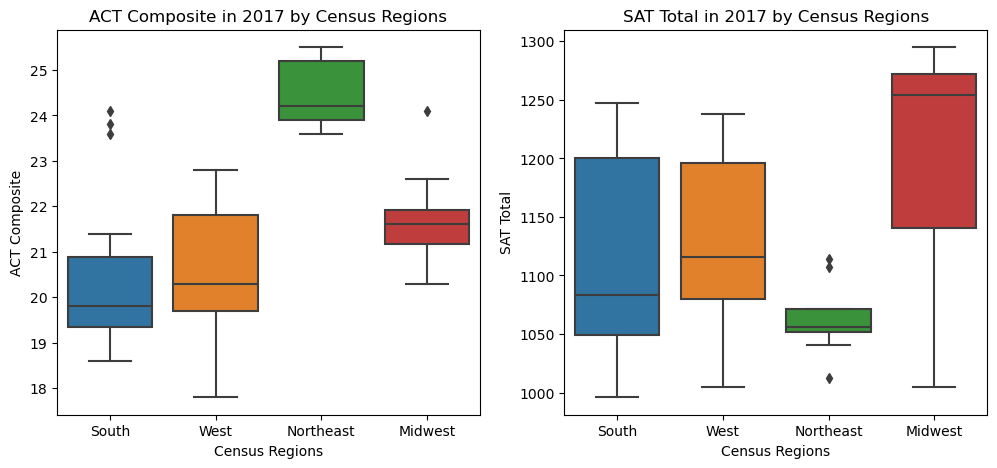

In [67]:
# Figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
# Plot first graph
sns.boxplot(x='census_region', y='act_composite', data=merge_2017, ax=ax1)
# Descriptive title for first plot
ax1.set_title('ACT Composite in 2017 by Census Regions')
# X and Y labels for first plot
ax1.set_xlabel('Census Regions')
ax1.set_ylabel('ACT Composite')

# Plot second graph
sns.boxplot(x='census_region', y='sat_total', data=merge_2017, ax=ax2)
# Descriptive title for first plot
ax2.set_title('SAT Total in 2017 by Census Regions')
# X and Y labels for first plot
ax2.set_xlabel('Census Regions')
ax2.set_ylabel('SAT Total')
plt.savefig('boxplot_act_scores_2017.png');

*Interpretation: The above image on the left displays a tighter box, indicating less variability as opposed to the image on the right.*

### Plot ACT Composite and Participation with Region - 2017

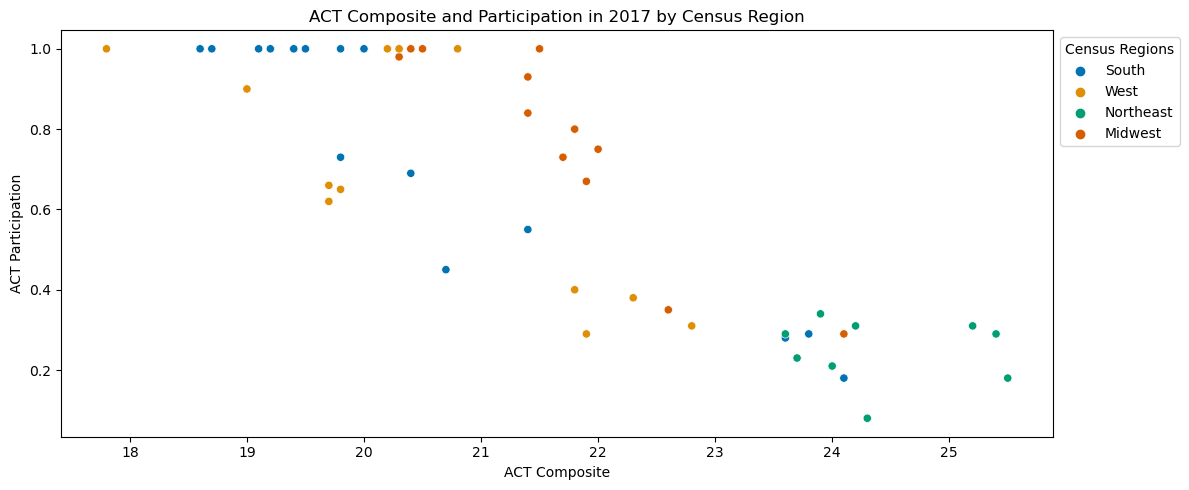

In [68]:
# Figure
plt.figure(figsize=(12,5))
# Plot
sns.scatterplot(x='act_composite', y='act_participation', hue='census_region', data=merge_2017, palette='colorblind')
# Title
plt.title('ACT Composite and Participation in 2017 by Census Region')
# Set X and Y
plt.xlabel('ACT Composite')
plt.ylabel('ACT Participation')
#Legend
plt.legend(title='Census Regions', bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.savefig('act_composite_participation_2017.png');

*Interpretation: The above image shows that the South region exhibits one of the higher participation rates out of the other regions however scores the lowest on the ACT. On the otherhand, the Northeast region demonstrates the lowest participation but achieves the highest scores.*

### Plot SAT Total and Participation with Region - 2017

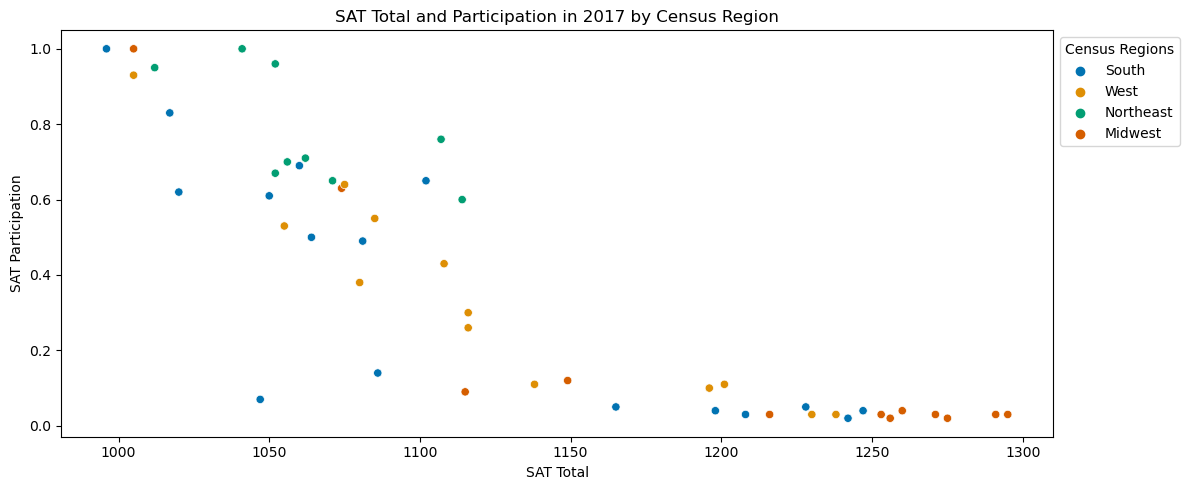

In [69]:
# Figure
plt.figure(figsize=(12,5))
# Plot
sns.scatterplot(x='sat_total', y='sat_participation', hue='census_region', data=merge_2017, palette='colorblind')
# Title
plt.title('SAT Total and Participation in 2017 by Census Region')
# Set X and Y
plt.xlabel('SAT Total')
plt.ylabel('SAT Participation')
#Legend
plt.legend(title='Census Regions', bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.savefig('sat_total_participation_2017.png');

*Interpretation: The above image illustrates that the Midwest exhibits the lowest participation rates but attains the highest scores on the SAT.*

### Boxplot for ACT Scores 2018 vs Regions

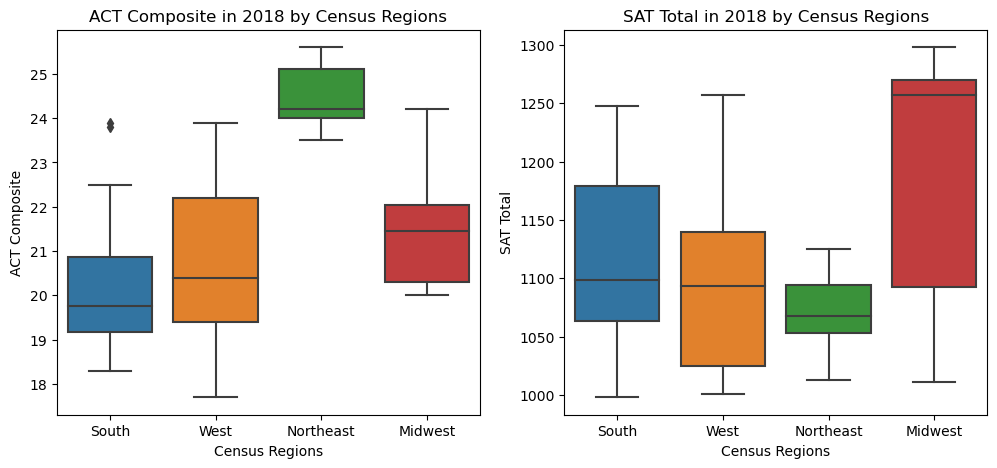

In [70]:
# Figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
# Plot first graph
sns.boxplot(x='census_region', y='act_composite', data=merge_2018, ax=ax1)
# Descriptive title for first plot
ax1.set_title('ACT Composite in 2018 by Census Regions')
# X and Y labels for first plot
ax1.set_xlabel('Census Regions')
ax1.set_ylabel('ACT Composite')

# Plot second graph
sns.boxplot(x='census_region', y='sat_total', data=merge_2018, ax=ax2)
# Descriptive title for first plot
ax2.set_title('SAT Total in 2018 by Census Regions')
# X and Y labels for first plot
ax2.set_xlabel('Census Regions')
ax2.set_ylabel('SAT Total')
plt.savefig('boxplot_act_scores_2018_vs_region.png');

*Interpretation: The above image illustrates that there is more variablility for each Census Region when taking the SAT as opposed to the ACT.*

### Plot ACT Composite and Participation with Region - 2018

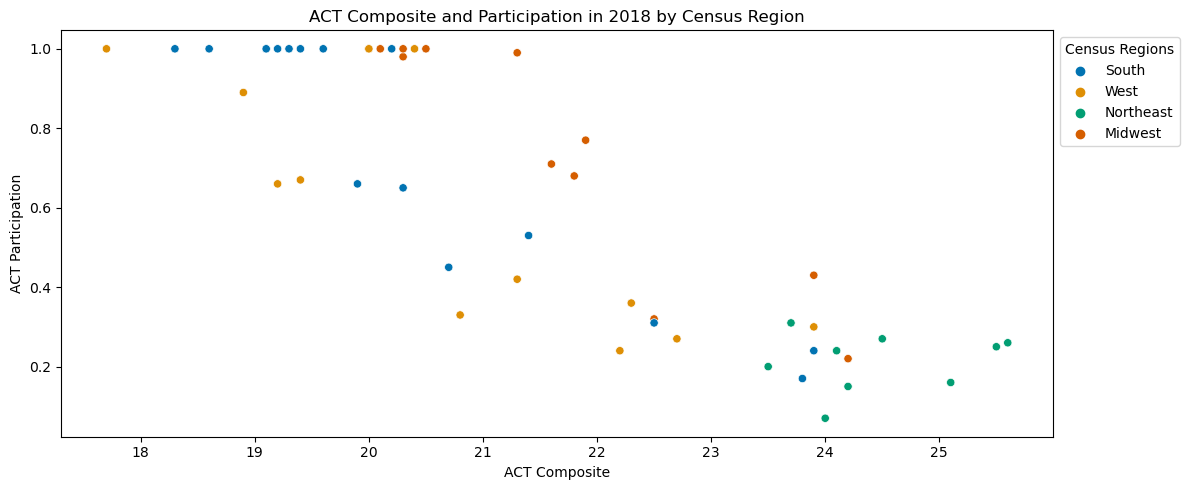

In [71]:
# Figure
plt.figure(figsize=(12,5))
# Plot
sns.scatterplot(x='act_composite', y='act_participation', hue='census_region', data=merge_2018, palette='colorblind')
# Title
plt.title('ACT Composite and Participation in 2018 by Census Region')
# Set X and Y
plt.xlabel('ACT Composite')
plt.ylabel('ACT Participation')
#Legend
plt.legend(title='Census Regions', bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.savefig('act_composite_participation_2018.png');

*Interpretation: The above image illustrates that Northeast region showcases high ACT scores ith low participation rates, contrasting with the South and Midwest where their rates are highest and scores are lowest.*

### Plot SAT Total and Participation with Region - 2018

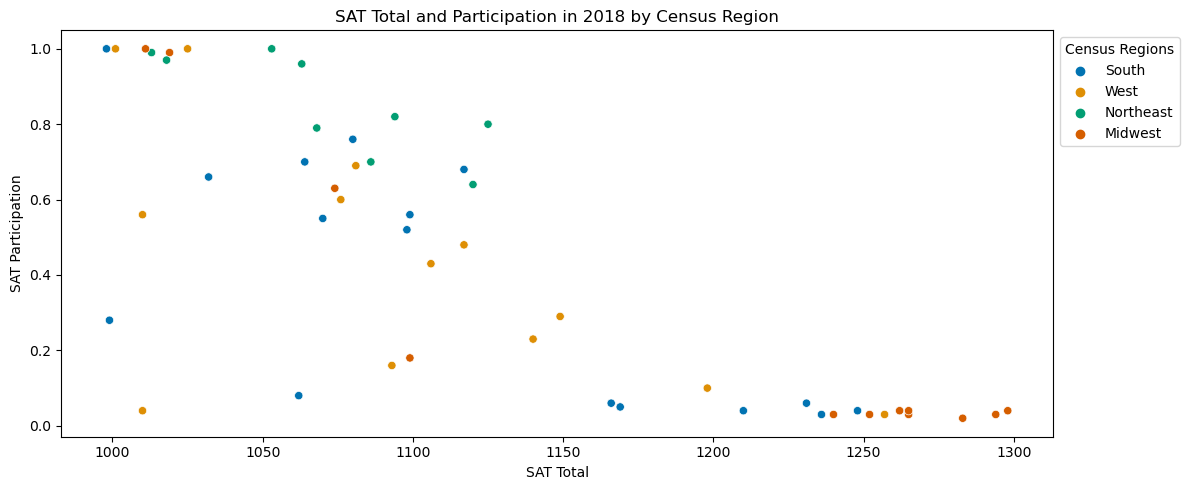

In [72]:
# Figure
plt.figure(figsize=(12,5))
# Plot
sns.scatterplot(x='sat_total', y='sat_participation', hue='census_region', data=merge_2018, palette='colorblind')
# Title
plt.title('SAT Total and Participation in 2018 by Census Region')
# Set X and Y
plt.xlabel('SAT Total')
plt.ylabel('SAT Participation')
#Legend
plt.legend(title='Census Regions', bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.savefig('sat_total_participation_2018.png');

*Interpretation: The image above reveals a wider spread of scores on the lower end of the spectrum for all regions, except the Midwest.*

### Boxplot for ACT Scores 2019 vs Regions

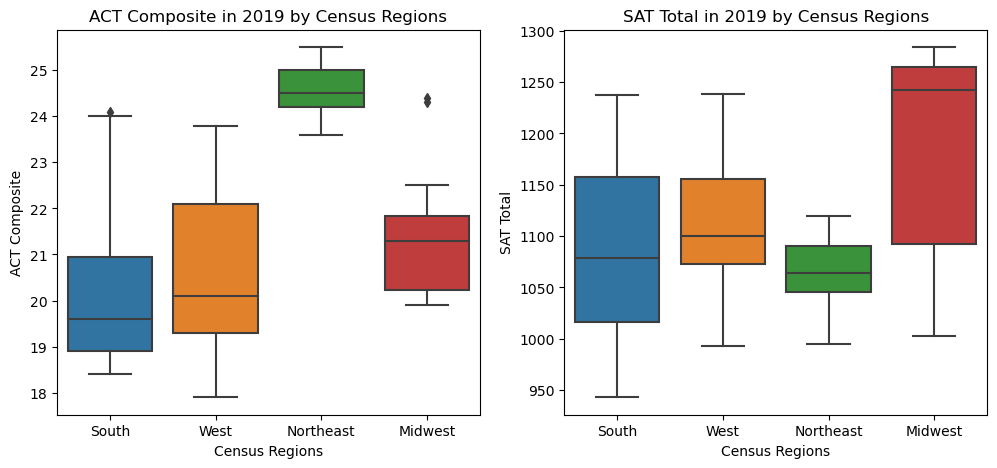

In [73]:
# Figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
# Plot first graph
sns.boxplot(x='census_region', y='act_composite', data=merge_2019, ax=ax1)
# Descriptive title for first plot
ax1.set_title('ACT Composite in 2019 by Census Regions')
# X and Y labels for first plot
ax1.set_xlabel('Census Regions')
ax1.set_ylabel('ACT Composite')

# Plot second graph
sns.boxplot(x='census_region', y='sat_total', data=merge_2019, ax=ax2)
# Descriptive title for first plot
ax2.set_title('SAT Total in 2019 by Census Regions')
# X and Y labels for first plot
ax2.set_xlabel('Census Regions')
ax2.set_ylabel('SAT Total')
plt.savefig('boxplot_act_scores_2019_vs_regions.png');

*Interpretation: The above image on the right shows all regions have similar SAT scores in regards to the median, indicating consistent performance. In contrast, to the left picture where the Northeast scores highest with less variability compared to the other regions.*

### Plot ACT Composite and Participation with Region - 2019

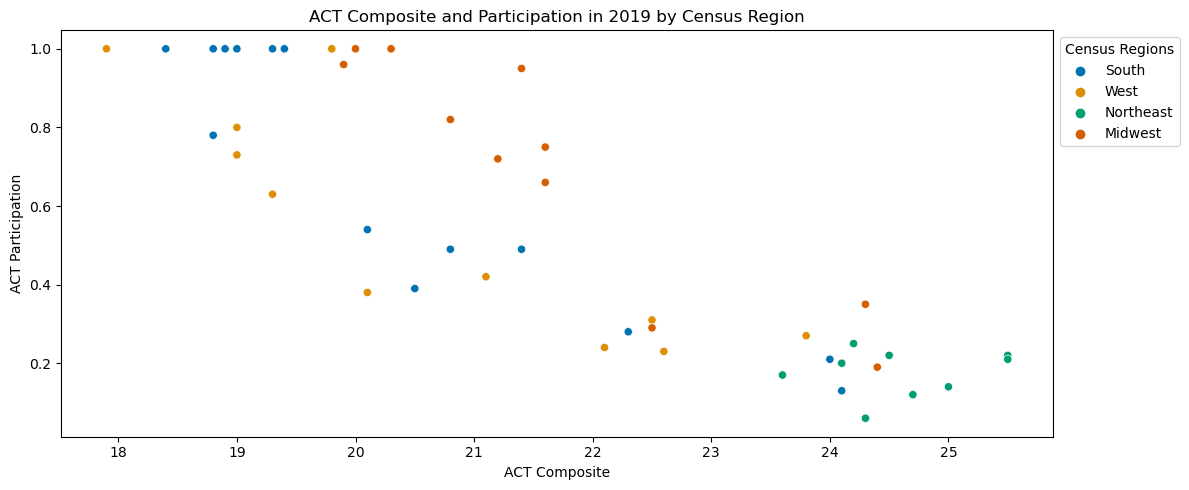

In [74]:
# Figure
plt.figure(figsize=(12,5))
# Plot
sns.scatterplot(x='act_composite', y='act_participation', hue='census_region', data=merge_2019, palette='colorblind')
# Title
plt.title('ACT Composite and Participation in 2019 by Census Region')
# Set X and Y
plt.xlabel('ACT Composite')
plt.ylabel('ACT Participation')
#Legend
plt.legend(title='Census Regions', bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.savefig('act_composite_participation_2019.png');

*Interpretation: The above image illustrates that the Northeast region achieves the highest scores with the lowest participation rate. On the other hand, the Midwest and South regions are more focused on the lower end on the spectrum with higher participation rates.*

### Plot SAT Total and Participation with Region - 2019

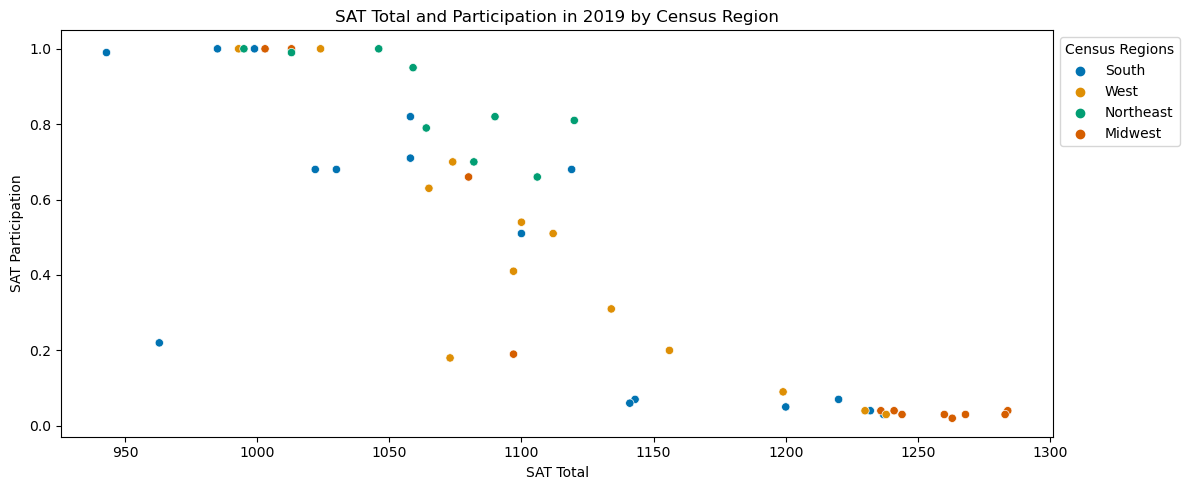

In [75]:
# Figure
plt.figure(figsize=(12,5))
# Plot
sns.scatterplot(x='sat_total', y='sat_participation', hue='census_region', data=merge_2019, palette='colorblind')
# Title
plt.title('SAT Total and Participation in 2019 by Census Region')
# Set X and Y
plt.xlabel('SAT Total')
plt.ylabel('SAT Participation')
#Legend
plt.legend(title='Census Regions', bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.savefig('sat_total_and_participation_2019.png');

*Interpretation: The above image illustrates that the Midwest region has the lowest participation rating but scores the highest out of the other regions. Additionally, there is more spread amongst the other regions.*

## Conclusions and Recommendations

Based on the data provided and the trends observed from 2017-2019, it is clear that the region that needs the most attention is the South considerating their participation rate being the highest out of all the regions, they scored the lowest in both the ACT and SAT. The data provided by census.gov in 2020 further demonstrates the disparity of resources across all regions, especially the South